# Data Scientist Case Study

## 1. Introduction

**Objective:** Having a data from a cloud-based digital commerce platform, to answer a question, how many searches does the keyword with rank 1 receive for each search engine? 

**Data used**: The first-party, structured data in .csv format, containing number of searches for each keyword, date, search engine and rank. The keywords, identified by their keyword_id, are ranked from most to least searched.

## 2. Data Exploration and Observations

In [28]:
import pandas as pd

# Load the data
keyword_df = pd.read_csv('case_study_junior_ds.csv')

# Display the first few rows and the summary information
keyword_df.info()
keyword_df.head()
keyword_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469308 entries, 0 to 469307
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   keyword_id     469308 non-null  int64 
 1   keyword_rank   469308 non-null  int64 
 2   date           469308 non-null  object
 3   searches       469308 non-null  int64 
 4   search_engine  469308 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 17.9+ MB


,keyword_id,keyword_rank,searches,search_engine
count,4.693080e+05,4.693080e+05,4.693080e+05,469308.000000
mean,1.955014e+12,7.439009e+05,8.550373e+03,6.818188
std,1.290018e+12,1.388063e+06,8.279563e+04,5.185202
min,5.850000e+03,3.000000e+00,0.000000e+00,0.000000
25%,7.988642e+11,7.421850e+04,0.000000e+00,3.000000
50%,1.838246e+12,2.360955e+05,0.000000e+00,5.000000
75%,3.049427e+12,7.821010e+05,3.000000e+03,10.000000
max,4.389457e+12,1.391182e+07,1.863716e+07,25.000000


- The dataset consists of 5 columns and 469,308 entries. 
- There are 4 columns of *int64* type: `keyword_id`, `keyword_rank`, `searches`, `search_engine`, and 1 *object* type: `date`. It means that in order to use the `data` column, it's better to convert it to a *datetime64* format.
- There is no missing values in any of the columns.
- The lowest `keyword_rank` in this dataset is 3, meaning that we don't have entries for the keyword with rank 1.

## 3. Data Cleaning

In [29]:
# Convert 'date' to datetime
keyword_df['date'] = pd.to_datetime(keyword_df['date'])

## 4. Creating Visualizations

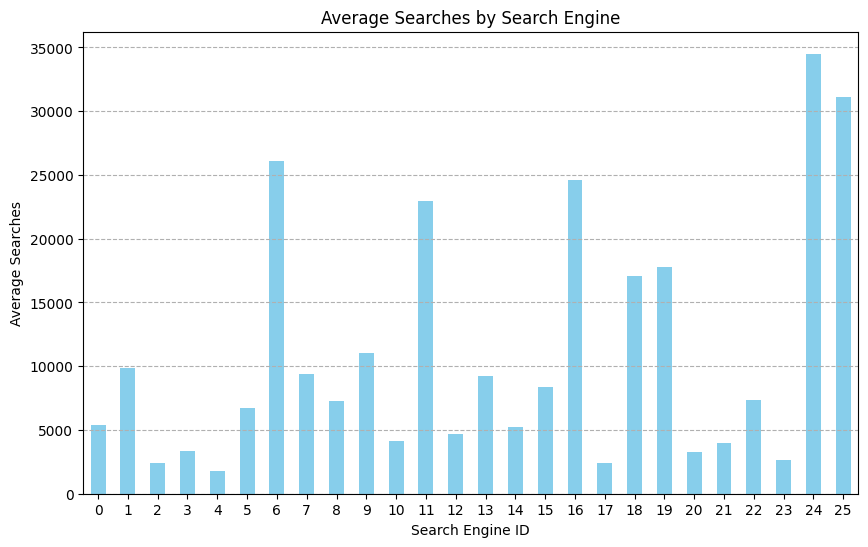

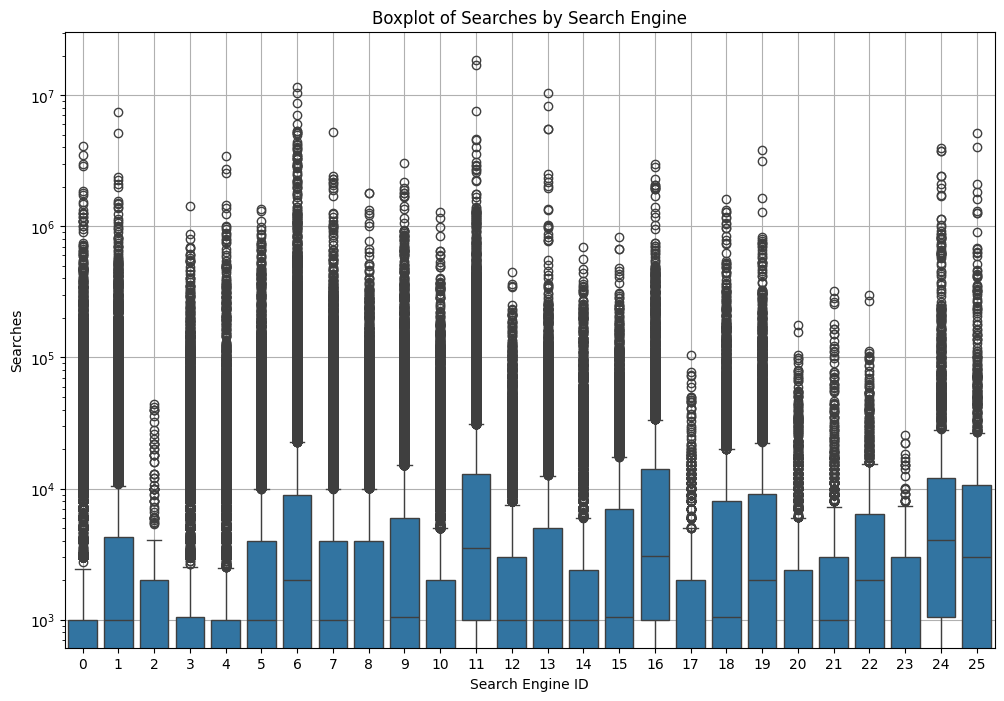

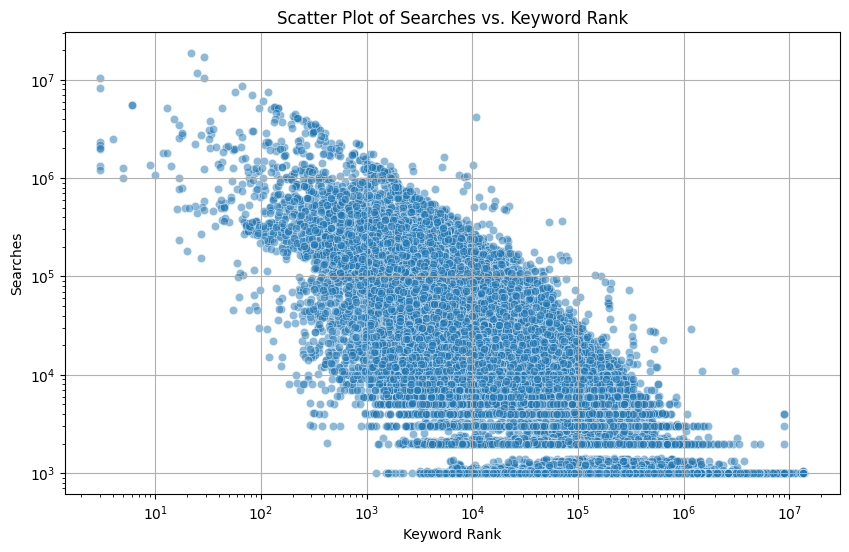

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar plot for average searches by search engine
average_searches_by_engine = keyword_df.groupby('search_engine')['searches'].mean()
plt.figure(figsize=(10, 6))
average_searches_by_engine.plot(kind='bar', color='skyblue')
plt.title('Average Searches by Search Engine')
plt.xlabel('Search Engine ID')
plt.ylabel('Average Searches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# Creating a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='search_engine', y='searches', data=keyword_df)
plt.title('Boxplot of Searches by Search Engine')
plt.xlabel('Search Engine ID')
plt.ylabel('Searches')
plt.yscale('log')  # Using a logarithmic scale to handle wide range values
plt.grid(True)
plt.show()

# Creating a scatter plot for searches and keyword rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='keyword_rank', y='searches', data=keyword_df, alpha=0.5)
plt.title('Scatter Plot of Searches vs. Keyword Rank')
plt.xlabel('Keyword Rank')
plt.ylabel('Searches')
plt.xscale('log') # Allowing a large range of data points to be displayed
plt.yscale('log')
plt.grid(True)
plt.show()


There is a considerable amount of dispersion, but, in general, lower-ranked keywords have a higher number of searches. It alignes with our knowledge that the ranking is based on searches.

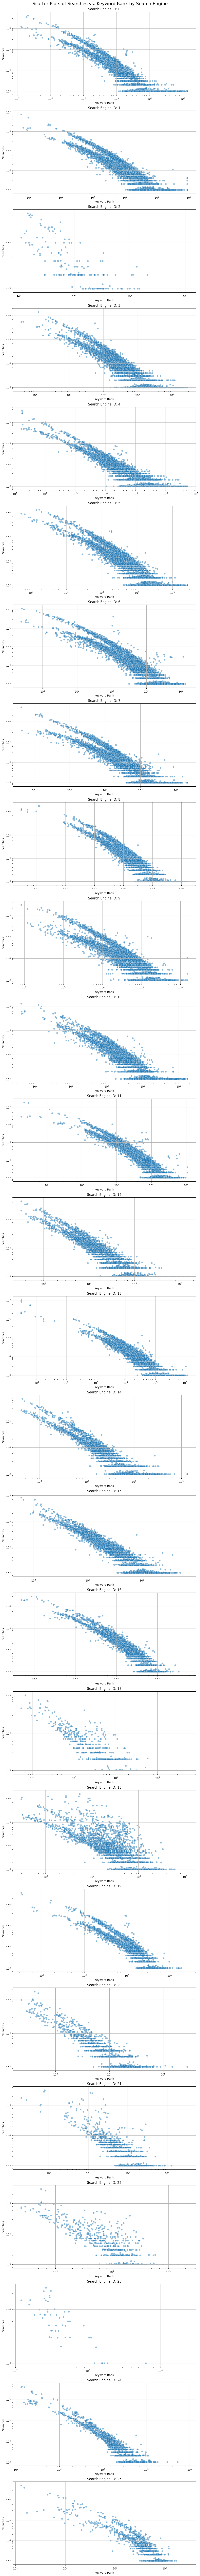

In [31]:
# Creating scatter plots for each search engine
search_engines = keyword_df['search_engine'].unique()
fig, axes = plt.subplots(nrows=len(search_engines), ncols=1, figsize=(10, 5 * len(search_engines)), constrained_layout=True)
fig.suptitle('Scatter Plots of Searches vs. Keyword Rank by Search Engine', fontsize=16)

for i, engine in enumerate(search_engines):
    engine_data = keyword_df[keyword_df['search_engine'] == engine]
    ax = axes[i] if len(search_engines) > 1 else axes
    sns.scatterplot(x='keyword_rank', y='searches', data=engine_data, alpha=0.5, ax=ax)
    ax.set_title(f'Search Engine ID: {engine}')
    ax.set_xlabel('Keyword Rank')
    ax.set_ylabel('Searches')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True)

plt.show()


## 5. Analysis

For answering a question regarding the number of searches received by the keyword ranked first on each search engine, I would firstly suggest checking the integrity of the data source. Since we lack information on the entities for the top-ranked keywords (ranks 1 and 2), there's a possibility that our dataset is incomplete, and we might find the exact search numbers elsewhere.

If that's not the case, and we must evaluate the search numbers based solely on the provided information, we'll need to use models to predict the number of searches for a keyword ranked first.

Linear regression could offer a straightforward model with coefficients directly describing the relationship between searches and rank, assisting us in finding the necessary information. However, it requires linear relationships between variables. From the visualization we've conducted, the relationship between searches and rank doesn't appear to be linear. Therefore, linear regression isn't suitable for prediction. Other approaches to finding the answer we need include using decision trees or random forests.

## 6. Conclusion and Suggestions for Further Analysis

Analysis of the provided data reveals that crucial information on top-ranked keywords, particularly those ranked first and second, is missing, suggesting potential data incompleteness. I would first suggest trying to acquire additional data, particularly on top-ranked keywords.

Despite this limitation, I attempted to answer the question with the data provided. Initially considering linear regression for its simplicity, I found the relationship between searches and rank to be non-linear, rendering linear regression unsuitable. Instead, decision trees or random forests could be alternatives due to their ability to capture complex relationships.

Additionally, investigating temporal trends might also provide insights and enhance future analysis.